<a href="https://colab.research.google.com/github/kibarmustofa/2341720034_ML_2025/blob/main/UTS/UTS_2341720034_Kibar_Mustofa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS



# Studi Kasus 2 - CC General

- Studi kasus ini berikaitan dengan data nasabah pengguna kartu kredit.
- Untuk mahasiswa dengan no absen 2, 5, 8, 11, dst
- Lakukan beberapa tahapan berikut dan lakukan proses analisis terhadap hasil yang dihasilkan.

## Pra Pengolahan Data (20 poin)

1. Load data (5 poin)
2. Lakukan data imputation pada data yang kosong. Lampirkan analisis Anda mengapa menggunakan metode impute tersebut. (10 poin)

## Clustering - 1 (30 poin)

1. Lakukan pembuatan model cluster dengan menggunakan KMeans dengan jumlah cluster mulai 1 hingga 10. (10 poin)
2. Buat diagram elbow, tentukan jumlah cluster terbaik menurut elbow method dan berikan alasan. (10 poin)
3. Hitung nilai silhouette coefficient dari k=1 hingga k=10. Berdassarkan nilai silhouette, berapa jumlah cluster terbaik? Apakah sama dengan metode elbow? (10 poin)

NB: Anda diperbolehkan untuk melakukan proses normalisasi/standardisasi sebelum pembuatan model clustering. Lakukan pengamatan terhadap hasil clustering.

## Clustering - 2 (20 poin)

1. Lakukan pembuatan model cluster dengan menggunakan DBSCAN. Berapa jumlah cluster yang dihasilkan? (10 poin)
2. Berapa nilai silhouette coefficient dan DBI dari cluster yang dihasilkan oleh DBSCAN? (10 poin)

## Feature Selection (30 poin)
Setelah mengetahui performa hasil clustering pada model KMeans dan DBSCAN berdasakan silhouette coefficient dan DBI, lakukan proses feature selection untuk meningkatkan nilai silhouette coefficient dan DBI. Anda diperbolehkan untuk menggunakan metode iterative process atau metode yang lain.

1. Fitur apa yang memberikan nilai silhouette coefficient/DBI terbaik? Lengkapi dengan proses pemilihan fitur
2. Mengapa Anda menggunakan metode pemilihan fitur tersebut?


## BONUS - CHALLENGE (30 poin)
Buatlah model ANNOY menggunakan data yang telah melalui proses pra pengolahan data. Lakukan query dengan 5 nilai terdekat. Apakah ANNOY melakukan query pada cluster terbaik yang telah Anda bentuk?


# STUDI KASUS 2 - CC GENERAL


# Tahap 1: Pra Pengolahan Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


1. Load data


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/2_CC_GENERAL.csv")
print("Ukuran data:", data.shape)
print("\nContoh data:")
print(data.head())


Ukuran data: (8950, 18)

Contoh data:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333  

2. Lakukan data imputation pada data yang kosong. Lampirkan analisis Anda mengapa menggunakan metode impute tersebut.


In [ ]:
print("\nJumlah data kosong per kolom:")
print(data.isnull().sum())



Jumlah data kosong per kolom:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [ ]:
imputer = SimpleImputer(strategy='median')
kolom_numerik = data.select_dtypes(include=[np.number]).columns
data[kolom_numerik] = imputer.fit_transform(data[kolom_numerik])
print("\nApakah masih ada data kosong setelah imputasi?:")
print(data.isnull().sum().any())


Apakah masih ada data kosong setelah imputasi?:
False


- pada percobaan kali ini saya melakukan inputation dengan median  dikarenakan dataset ini menggunakan numerik dan mencegaj adaya outlier yang berlebih

3. Drop fitur yang tidak relevan

- pada percobaan kali ini saya melakukan drop pada custumer id karena bersifat unuk dan berbeda denga oran lain jadi data tidak bisa dilakukan segmentasi

In [ ]:
data = data.drop(columns=['CUST_ID'])

print("\nKolom setelah pembersihan:")
print(list(data.columns))

# Menampilkan ukuran data akhir
print("\nUkuran data setelah pembersihan:", data.shape)


Kolom setelah pembersihan:
['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

Ukuran data setelah pembersihan: (8950, 17)


# Tahap 2: CLUSTERING - 1 (KMeans)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

1. Lakukan pembuatan model cluster dengan menggunakan KMeans dengan jumlah cluster mulai 1 hingga 10.

normalisasi data


In [ ]:
skaler = StandardScaler()
data_normal = skaler.fit_transform(data)

membuat model kmeans dengan jumlah cluster 1-10

In [ ]:
jumlah_cluster = range (1,11)
SSE= []
for k in jumlah_cluster :
  model = KMeans (n_clusters=k, random_state =11, n_init=10) # Added n_init to suppress future warnings
  model.fit(data_normal)

  # Simpan nilai inertia untuk metode elbow
  SSE.append(model.inertia_)

membuat diagram elbow


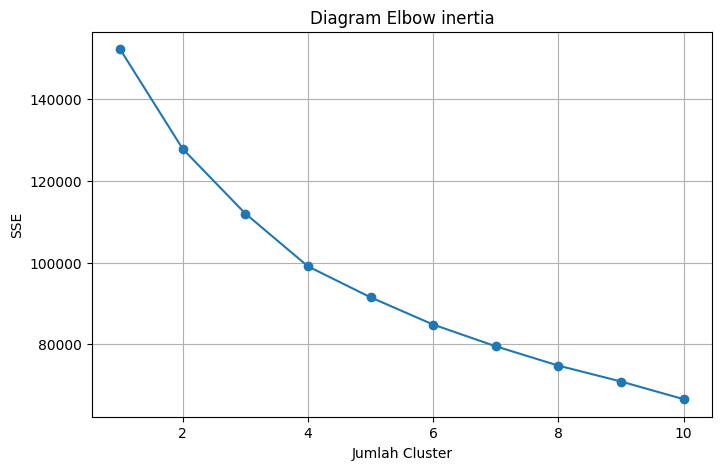

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(jumlah_cluster, SSE, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.title('Diagram Elbow inertia')
plt.grid(True)
plt.show()

- Berdasarkan hasil diagram Elbow, jumlah cluster terbaik adalah 4. Hal ini terlihat dari penurunan nilai SSE yang cukup tajam dari cluster 1 hingga 4, menandakan peningkatan kualitas pengelompokan yang signifikan. Setelah titik ke-4, kurva mulai melandai, sehingga penambahan cluster selanjutnya tidak memberikan peningkatan berarti. Dengan demikian, k=4 menjadi pilihan optimal karena sudah cukup memisahkan data dengan baik tanpa membuat cluster yang lebih banyak.

menghitung nilai silhouette_score


Jumlah cluster = 2, Nilai silhouette = 0.2099
Jumlah cluster = 3, Nilai silhouette = 0.2510
Jumlah cluster = 4, Nilai silhouette = 0.1977
Jumlah cluster = 5, Nilai silhouette = 0.1930
Jumlah cluster = 6, Nilai silhouette = 0.2027
Jumlah cluster = 7, Nilai silhouette = 0.2152
Jumlah cluster = 8, Nilai silhouette = 0.2188
Jumlah cluster = 9, Nilai silhouette = 0.2131
Jumlah cluster = 10, Nilai silhouette = 0.2203


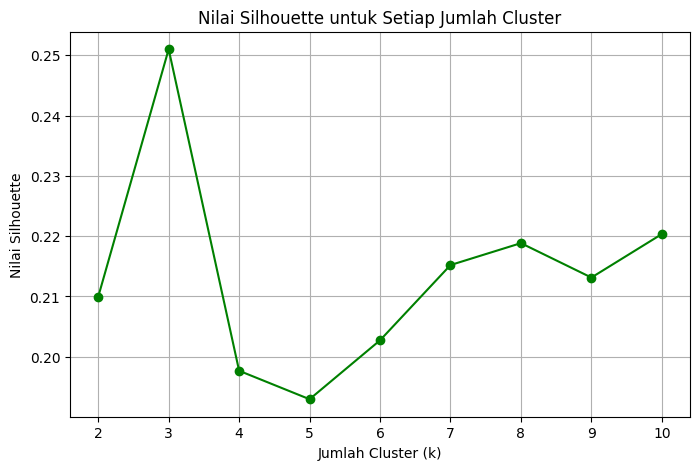


 Jumlah cluster terbaik berdasarkan Silhouette Coefficient adalah: 3


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


jumlah_cluster = range(2, 11)

nilai_silhouette = []

for k in jumlah_cluster:
    model = KMeans(n_clusters=k, random_state=11, n_init=10)
    model.fit(data_normal)

    # Menentukan label cluster hasil KMeans
    label_cluster = model.labels_

    # Menghitung nilai silhouette untuk k tersebut
    skor = silhouette_score(data_normal, label_cluster)
    nilai_silhouette.append(skor)

    print(f"Jumlah cluster = {k}, Nilai silhouette = {skor:.4f}")


plt.figure(figsize=(8, 5))
plt.plot(jumlah_cluster, nilai_silhouette, marker='o', linestyle='-', color='green')
plt.title('Nilai Silhouette untuk Setiap Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Nilai Silhouette')
plt.grid(True)
plt.show()

# Menentukan cluster terbaik
cluster_terbaik = jumlah_cluster[nilai_silhouette.index(max(nilai_silhouette))]
print(f"\n Jumlah cluster terbaik berdasarkan Silhouette Coefficient adalah: {cluster_terbaik}")


- dari hasil silhoute dan dari banyak kluster yang baru saya coba dan setelah  saya pelajari adalah nilai tertinggi atau yang nilai dekat dengan 1 merupakan nilai clustering terbaik dari nilai silhoutte jadi **Jumlah cluster terbaik berdasarkan Silhouette Coefficient adalah: 3 dan jadi jumlah cluster terbaik ada 3
**

# Tahap 3: Clustering – 2 (DBSCAN)

- berikut saya menggunakan min_sample = 36 karena saya menggunakan peraturan 2*D karena data yang banyak lebih dari 1 dimensi, dan dibawah ini saya gunakan untuk memperoleh nilai yang mendekati nilai 1 jadi eps saya akan menggunakan 1.3

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


for eps in [0.3, 0.5, 0.7, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,]:
  for m in [36]:
    dbscan = DBSCAN(eps=eps, min_samples=m)
    dbscan.fit(data_normal)
    labels = dbscan.labels_
    jumlah_cluster = len(set(labels)) - (1 if -1 in labels else 0)
    if jumlah_cluster > 1:
        silhouette = silhouette_score(data_normal, labels)
        print(f"eps={eps} -> cluster={jumlah_cluster}, silhouette={silhouette:.3f}")


eps=0.3 -> cluster=2, silhouette=-0.242
eps=0.5 -> cluster=3, silhouette=-0.258
eps=0.7 -> cluster=2, silhouette=-0.087
eps=1.0 -> cluster=3, silhouette=-0.023
eps=1.1 -> cluster=3, silhouette=-0.016
eps=1.3 -> cluster=2, silhouette=0.125
eps=1.4 -> cluster=3, silhouette=0.106


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

dbscan = DBSCAN(eps=1.3, min_samples=36)
dbscan.fit(data_normal)

labels = dbscan.labels_
jumlah_cluster = len(set(labels)) - (1 if -1 in labels else 0)

print("Jumlah cluster yang dihasilkan:", jumlah_cluster)

if jumlah_cluster > 1:
    silhouette = silhouette_score(data_normal, labels)
    dbi = davies_bouldin_score(data_normal, labels)
    print("Silhouette Coefficient:", silhouette)
    print("Davies-Bouldin Index (DBI):", dbi)
else:
    print("Semua data dianggap noise atau hanya 1 cluster")


Jumlah cluster yang dihasilkan: 2
Silhouette Coefficient: 0.1254057573543082
Davies-Bouldin Index (DBI): 2.278921627707899


- jadi untuk cluster yang dihasilkan ada 2
- untuk silhoute(0.12) hasil masih mendekati 0 jadi hasil masih dekat antara batas dengan claster dan hasil cluster yang terbantuk masih tumpang tindih l
- untuk DBI (2.28) Nilai ini tergolong tinggi, yang menunjukkan bahwa cluster-cluster tersebut tidak padat secara internal dan tidak terpisah dengan baik satu sama lain.

# Tahap 4: Feature Selection

In [ ]:
fitur_kandidat = [
    ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT'],
    ['BALANCE', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'],
    ['BALANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES'],
    ['BALANCE', 'CASH_ADVANCE', 'CREDIT_LIMIT'],
    ['PURCHASES', 'INSTALLMENTS_PURCHASES', 'TENURE']

]

hasil = []


for fitur in fitur_kandidat:
    data_subset = skaler.fit_transform(data[fitur])


    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    kmeans.fit(data_subset)


    labels = kmeans.labels_
    silhouette = silhouette_score(data_subset, labels)
    dbi = davies_bouldin_score(data_subset, labels)


    hasil.append({
        'fitur': fitur,
        'silhouette': silhouette,
        'dbi': dbi
    })


hasil_df = pd.DataFrame(hasil).sort_values(by='silhouette', ascending=False)
print(hasil_df)

                                              fitur  silhouette       dbi
4       [PURCHASES, INSTALLMENTS_PURCHASES, TENURE]    0.666049  0.731072
2  [BALANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES]    0.482824  0.771687
0                [BALANCE, PURCHASES, CREDIT_LIMIT]    0.455294  0.973441
3             [BALANCE, CASH_ADVANCE, CREDIT_LIMIT]    0.450995  0.989620
1      [BALANCE, PURCHASES, PAYMENTS, CREDIT_LIMIT]    0.433784  1.161904


Fitur apa yang memberikan nilai silhouette coefficient/DBI terbaik? Lengkapi dengan proses pemilihan fitur

- berdasarkan hasil yang muncul diperoleh fitur terbaik ada pada
Fitur Terbaik: ['PURCHASES', 'INSTALLMENTS_PURCHASES', 'TENURE'] dengan Silhouette Coefficient: 0.666 (tertinggi) dan DBI: 0.731 (terendah)

- Nilai silhouette coefficient tertinggi menunjukkan bahwa hasil clustering memiliki pemisahan antar kluster yang paling jelas dan konsisten secara internal.

- Nilai DBI yang rendah menandakan kluster yang terbentuk lebih kompak dan terpisah dengan baik.

Mengapa Anda menggunakan metode pemilihan fitur tersebut?

- Seleksi fitur untuk clustering dilakukan secara iteratif karena tidak adanya label kelas sebagai panduan. Proses ini melibatkan pengujian kombinasi fitur secara bertahap, di mana setiap hasilnya dievaluasi menggunakan Silhouette Coefficient dan Davies-Bouldin Index (DBI) untuk menemukan kombinasi fitur yang paling optimal.

# BONUS SOAL
